In [8]:
import pandas as pd


In [9]:
df = pd.read_csv("CO2 Emissions_Canada.csv")
df.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [10]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.cluster import KMeans
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import accuracy_score, r2_score
import matplotlib.pyplot as plt


In [13]:
df = pd.read_csv("CO2 Emissions_Canada.csv")
df.head()

,Make,Model,Vehicle Class,Engine Size(L),Cylinders,Transmission,Fuel Type,Fuel Consumption City (L/100 km),Fuel Consumption Hwy (L/100 km),Fuel Consumption Comb (L/100 km),Fuel Consumption Comb (mpg),CO2 Emissions(g/km)
0,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [14]:
# Drop any null values (optional, dataset is clean)
df.dropna(inplace=True)

# Encode categorical columns like 'Make', 'Model', 'Fuel Type', etc.
from sklearn.preprocessing import LabelEncoder

label_cols = df.select_dtypes(include='object').columns

for col in label_cols:
    df[col] = LabelEncoder().fit_transform(df[col])


In [18]:
# Assuming 'CO2 Emissions(g/km)' is your target variable for regression
X = df.drop('CO2 Emissions(g/km)', axis=1) # Adjust column name if different
y = df['CO2 Emissions(g/km)'] # Adjust column name if different

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [21]:
# Example for classification: Create a binary target
# You need to define a threshold for 'High' vs 'Low' emissions
threshold = df['CO2 Emissions(g/km)'].median() # Or any other meaningful threshold
df['Emission_Category'] = (df['CO2 Emissions(g/km)'] > threshold).astype(int)

X_cls = df.drop(['CO2 Emissions(g/km)', 'Emission_Category'], axis=1)
y_cls = df['Emission_Category']

X_train_cls, X_test_cls, y_train_cls, y_test_cls = train_test_split(X_cls, y_cls, test_size=0.2, random_state=42)

scaler_cls = StandardScaler()
X_train_cls_scaled = scaler_cls.fit_transform(X_train_cls)
X_test_cls_scaled = scaler_cls.transform(X_test_cls)

In [22]:
logistic_model = LogisticRegression(solver='liblinear', random_state=42) # 'liblinear' is good for small datasets
logistic_model.fit(X_train_cls_scaled, y_train_cls)

LogisticRegression(random_state=42, solver='liblinear')

In [23]:
y_pred_logistic = logistic_model.predict(X_test_cls_scaled)

In [24]:
print(f"Logistic Regression Accuracy: {accuracy_score(y_test_cls, y_pred_logistic):.4f}")
# You can add more classification metrics here

Logistic Regression Accuracy: 0.9336


In [25]:
dt_regressor = DecisionTreeRegressor(random_state=42)
dt_regressor.fit(X_train, y_train) # Use unscaled data

DecisionTreeRegressor(random_state=42)

In [26]:
y_pred_dt = dt_regressor.predict(X_test)

In [27]:
print(f"Decision Tree Regressor R-squared: {r2_score(y_test, y_pred_dt):.4f}")
# You can add MSE, MAE here as well

Decision Tree Regressor R-squared: 0.9972


In [28]:
# For Polynomial Regression, scaling after creating polynomial features is often beneficial
# Start with X_train and X_test (unscaled)
poly = PolynomialFeatures(degree=2) # You can experiment with different degrees (e.g., 2, 3)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

# Scale the polynomial features
scaler_poly = StandardScaler()
X_train_poly_scaled = scaler_poly.fit_transform(X_train_poly)
X_test_poly_scaled = scaler_poly.transform(X_test_poly)

In [29]:
poly_regressor = LinearRegression()
poly_regressor.fit(X_train_poly_scaled, y_train)

LinearRegression()

In [30]:
y_pred_poly = poly_regressor.predict(X_test_poly_scaled)

In [31]:
print(f"Polynomial Regression R-squared: {r2_score(y_test, y_pred_poly):.4f}")

Polynomial Regression R-squared: 0.9858


In [32]:
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1) # n_jobs=-1 uses all available cores
rf_regressor.fit(X_train, y_train) # Use unscaled data

RandomForestRegressor(n_jobs=-1, random_state=42)

In [33]:
y_pred_rf = rf_regressor.predict(X_test)

In [34]:
print(f"Random Forest Regressor R-squared: {r2_score(y_test, y_pred_rf):.4f}")

Random Forest Regressor R-squared: 0.9978


In [35]:
# K-Means typically uses all features for clustering
# For K-Means, you don't need a y variable, just X
# Using the original X (all features except CO2 emissions)
X_clustering = df.drop('CO2 Emissions(g/km)', axis=1) # Or select a subset of features

# Scale the data for K-Means
scaler_kmeans = StandardScaler()
X_clustering_scaled = scaler_kmeans.fit_transform(X_clustering)

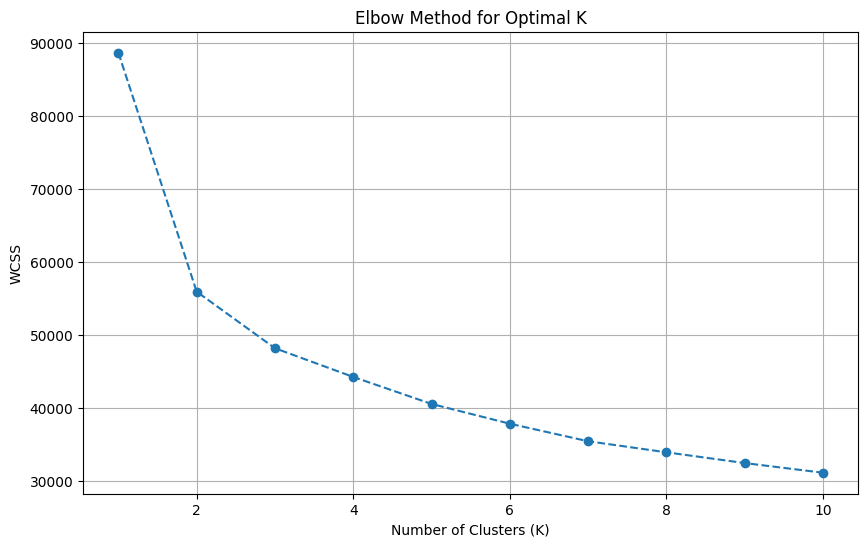

In [36]:
wcss = [] # Within-cluster sum of squares
for i in range(1, 11): # Test k from 1 to 10
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42, n_init=10)
    kmeans.fit(X_clustering_scaled)
    wcss.append(kmeans.inertia_) # inertia is the WCSS

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method for Optimal K')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

In [37]:
optimal_k = 3 # Replace with the K you determined from the elbow plot
kmeans_model = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42, n_init=10)
clusters = kmeans_model.fit_predict(X_clustering_scaled)
df['Cluster'] = clusters # Add cluster assignments back to your original DataFrame

In [38]:
# Example: Analyze cluster characteristics
print(df.groupby('Cluster').mean())
# You can also visualize using scatter plots of important features,
# or use dimensionality reduction techniques like PCA if your dataset has many dimensions.

              Make        Model  Vehicle Class  Engine Size(L)  Cylinders  \
Cluster                                                                     
0        21.236741   956.427009       5.442592        2.174604   4.327501   
1        15.697389  1223.461598       8.290323        5.282873   8.284178   
2        19.135670  1017.799175       6.721237        3.506845   6.124124   

         Transmission  Fuel Type  Fuel Consumption City (L/100 km)  \
Cluster                                                              
0           16.347458   3.294697                          9.880891   
1            9.049923   3.003840                         18.077803   
2           13.201237   3.351753                         13.628206   

         Fuel Consumption Hwy (L/100 km)  Fuel Consumption Comb (L/100 km)  \
Cluster                                                                      
0                               7.379442                          8.754893   
1                            

In [40]:
# Handle any potential missing values by dropping rows with NaNs
df.dropna(inplace=True)
print("\nDataFrame after dropping rows with any missing values:")
print(f"Number of rows: {df.shape[0]}, Number of columns: {df.shape[1]}")

# Identify categorical columns (object dtype)
label_cols = df.select_dtypes(include='object').columns
print(f"\nCategorical columns identified for encoding: {list(label_cols)}")

# Apply Label Encoding to each categorical column
for col in label_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    print(f"Column '{col}' encoded.")

print("\nFirst 5 rows of the DataFrame after preprocessing (categorical encoding):")
print(df.head())


DataFrame after dropping rows with any missing values:
Number of rows: 7385, Number of columns: 14

Categorical columns identified for encoding: []

First 5 rows of the DataFrame after preprocessing (categorical encoding):
   Make  Model  Vehicle Class  Engine Size(L)  Cylinders  Transmission  \
0     0   1057              0             2.0          4            14   
1     0   1057              0             2.4          4            25   
2     0   1058              0             1.5          4            22   
3     0   1233             11             3.5          6            15   
4     0   1499             11             3.5          6            15   

   Fuel Type  Fuel Consumption City (L/100 km)  \
0          4                               9.9   
1          4                              11.2   
2          4                               6.0   
3          4                              12.7   
4          4                              12.1   

   Fuel Consumption Hwy (L/100

In [41]:
# Define Features (X) and Target (Y)
# 'CO2 Emissions(g/km)' is our target variable, all other columns are features.
X = df.drop('CO2 Emissions(g/km)', axis=1).values # Features
Y = df['CO2 Emissions(g/km)'].values # Target

print(f"\nShape of Features (X): {X.shape}")
print(f"Shape of Target (Y): {Y.shape}")

# Split the data into training and testing sets
# test_size=0.2 means 20% of the data will be used for testing, 80% for training.
# random_state ensures reproducibility of the split.
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=40)

print(f"\nShape of Training Features (x_train): {x_train.shape}")
print(f"Shape of Testing Features (x_test): {x_test.shape}")
print(f"Shape of Training Target (y_train): {y_train.shape}")
print(f"Shape of Testing Target (y_test): {y_test.shape}")


Shape of Features (X): (7385, 13)
Shape of Target (Y): (7385,)

Shape of Training Features (x_train): (5908, 13)
Shape of Testing Features (x_test): (1477, 13)
Shape of Training Target (y_train): (5908,)
Shape of Testing Target (y_test): (1477,)


In [42]:
# Scale the features using StandardScaler
scaler = StandardScaler()

# Fit the scaler on the training data and transform it
x_train = scaler.fit_transform(x_train)

# Transform the test data using the scaler fitted on the training data
x_test = scaler.transform(x_test)

print("\nFeatures scaled successfully!")
print(f"First 5 rows of scaled Training Features (x_train): \n{x_train[:5]}")
print(f"First 5 rows of scaled Testing Features (x_test): \n{x_test[:5]}")


Features scaled successfully!
First 5 rows of scaled Training Features (x_train): 
[[-0.75944823 -0.94444563 -1.10838294  2.39401815  1.31523239 -1.250677
   0.83094118  0.89388672  0.20756221  0.66299483 -0.76044391  1.02329079
   0.19130285]
 [-1.28880408  0.29882347  0.75841901  0.91850158  1.31523239 -0.69964977
   0.83094118  1.34793906  1.10001703  1.2808573  -1.17404774  1.02329079
   0.19130285]
 [ 0.74039334 -0.49014088  0.75841901 -0.11436003  0.21810666 -1.11292019
   0.83094118  0.04253859  0.47529866  0.21676082 -0.48470803  1.02329079
   1.31143888]
 [-1.28880408  0.27454764 -1.31580538 -0.11436003  0.21810666 -0.69964977
   0.83094118  0.43983438  0.29680769  0.38838929 -0.62257597  1.02329079
   1.31143888]
 [-0.40654434  1.29933431  0.96584145  0.32829495  0.21810666 -1.52619062
  -0.28911369  0.69523882  0.60916688  0.69732052 -0.76044391  1.02329079
   1.31143888]]
First 5 rows of scaled Testing Features (x_test): 
[[ 0.65216736 -0.71902725  0.96584145 -0.48323917 -

In [43]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

# Build the Neural Network Model
# Sequential model is a linear stack of layers
model = Sequential([
    # First Dense layer (hidden layer)
    # 64 neurons, 'relu' activation, input_shape specifies the number of features
    Dense(64, activation='relu', input_shape=(x_train.shape[1],)),
    # Second Dense layer (another hidden layer)
    # 32 neurons, 'relu' activation
    Dense(32, activation='relu'),
    # Output layer
    # 1 neuron for regression (predicting a single continuous value)
    # No activation function for linear output
    Dense(1)
])

print("\nNeural Network model built successfully!")
# Display a summary of the model's architecture
model.summary()


Neural Network model built successfully!


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 64)             │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,009 (11.75 KB)

 Trainable params: 3,009 (11.75 KB)

 Non-trainable params: 0 (0.00 B)

In [44]:
# Compile the model
# optimizer='adam' is a popular choice for its efficiency
# loss='mse' (Mean Squared Error) is suitable for regression tasks
# metrics=['mae'] (Mean Absolute Error) to monitor performance during training
model.compile(optimizer='adam', loss='mse', metrics=['mae'])

print("\nModel compiled successfully with Adam optimizer, Mean Squared Error loss, and Mean Absolute Error metric.")


Model compiled successfully with Adam optimizer, Mean Squared Error loss, and Mean Absolute Error metric.


In [45]:
# Train the model
# epochs=50: The model will go through the entire training data 50 times.
# batch_size=32: The model will update its weights after processing 32 samples.
# validation_split=0.2: 20% of the training data will be used for validation.
history = model.fit(x_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

print("\nModel training complete!")
print("Training history (loss and MAE over epochs) is stored in the 'history' object.")

Epoch 1/50
148/148 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 64180.6406 - mae: 246.1566 - val_loss: 42356.8281 - val_mae: 196.3662
Epoch 2/50
148/148 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 27411.5801 - mae: 150.3463 - val_loss: 7579.7993 - val_mae: 71.2369
Epoch 3/50
148/148 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 6667.3726 - mae: 66.5982 - val_loss: 3718.3870 - val_mae: 48.3261
Epoch 4/50
148/148 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 3201.9304 - mae: 45.1901 - val_loss: 1733.3651 - val_mae: 32.3136
Epoch 5/50
148/148 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 1549.7207 - mae: 30.7616 - val_loss: 930.1382 - val_mae: 23.7307
Epoch 6/50
148/148 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 845.6627 - mae: 22.7488 - val_loss: 573.6723 - val_mae: 18.8198
Epoch 7/50
148/148 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 506.3521 - mae: 17.6474 - val_loss: 396.3791 - val_mae: 15.3652
Epoch 8/50
148/148 ━━━━━━━━━━━━━━━━━━━━ 1s 4ms/step - loss: 364.4045 - mae: 14.7982 - val_loss: 303.8703 - val_mae: 1

In [46]:
# Evaluate the model on the test set
# This will return the loss (mse) and the metrics (mae) on the unseen data
test_loss, test_mae = model.evaluate(x_test, y_test, verbose=1)

print(f"\n--- Model Evaluation on Test Set ---")
print(f"Test Mean Absolute Error (MAE): {test_mae:.2f}")
print(f"Test Mean Squared Error (MSE): {test_loss:.2f}")
print("\nMAE indicates that, on average, your model's predictions are off by approximately this many g/km from the actual CO2 emissions.")

47/47 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 25.3544 - mae: 3.8143

--- Model Evaluation on Test Set ---
Test Mean Absolute Error (MAE): 3.91
Test Mean Squared Error (MSE): 27.47

MAE indicates that, on average, your model's predictions are off by approximately this many g/km from the actual CO2 emissions.


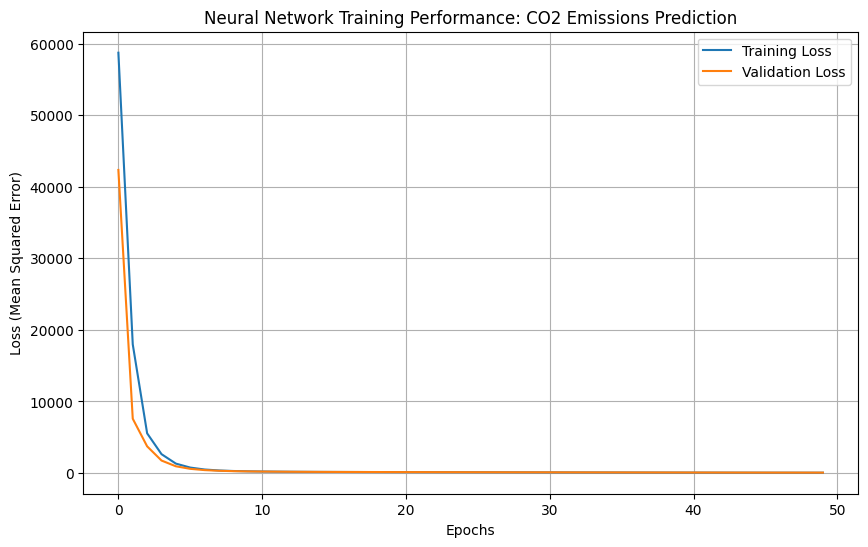


--- All steps completed for CO2 Emissions prediction using Neural Network ---


In [48]:
import matplotlib.pyplot as plt

# Plot the training and validation loss history
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss (Mean Squared Error)')
plt.title('Neural Network Training Performance: CO2 Emissions Prediction')
plt.legend()
plt.grid(True)
plt.show()

print("\n--- All steps completed for CO2 Emissions prediction using Neural Network ---")